# Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# **PART I LogisticRegression**

# Load Dataset

In [3]:
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Description Of The Data

In [4]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Plot Variables

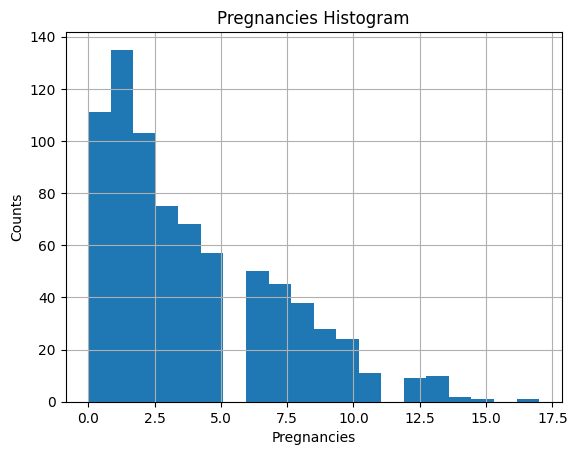

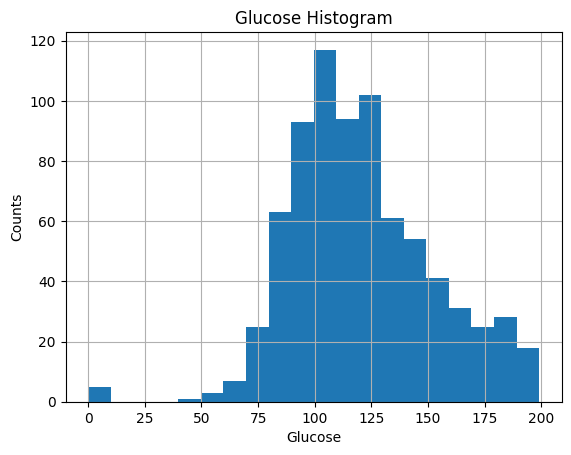

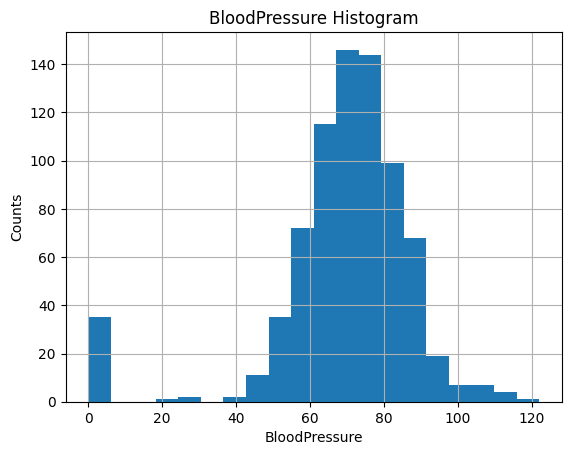

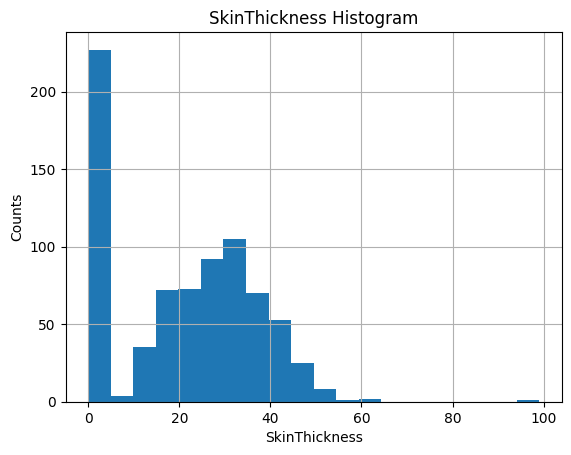

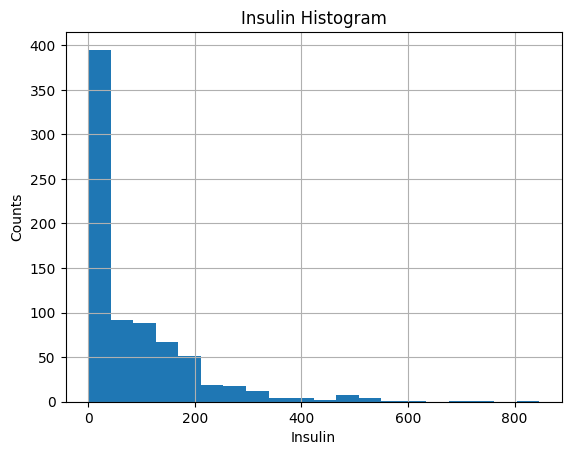

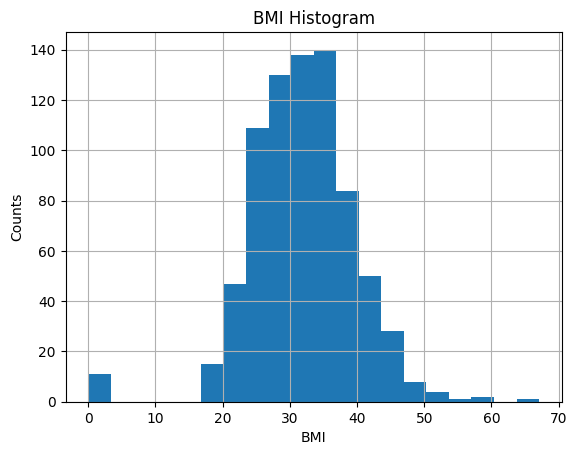

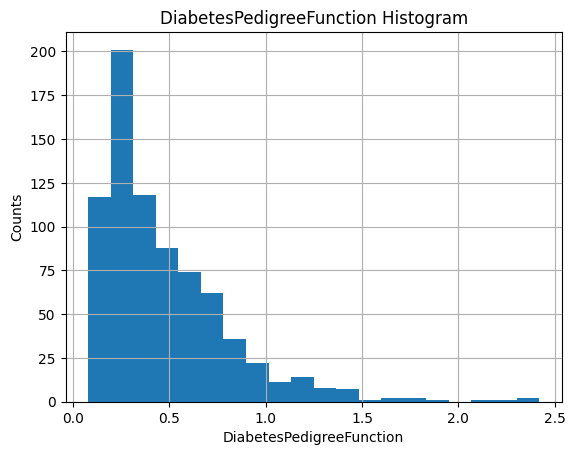

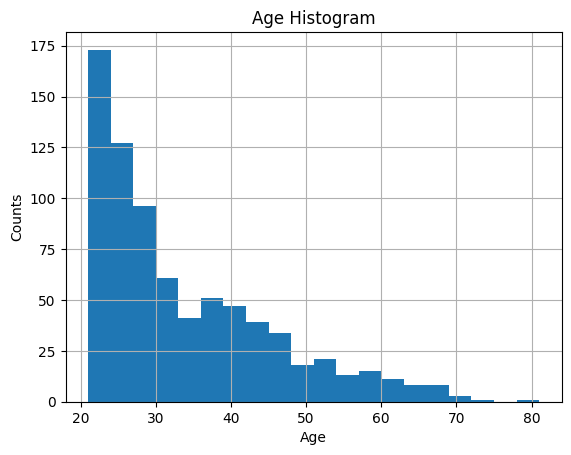

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

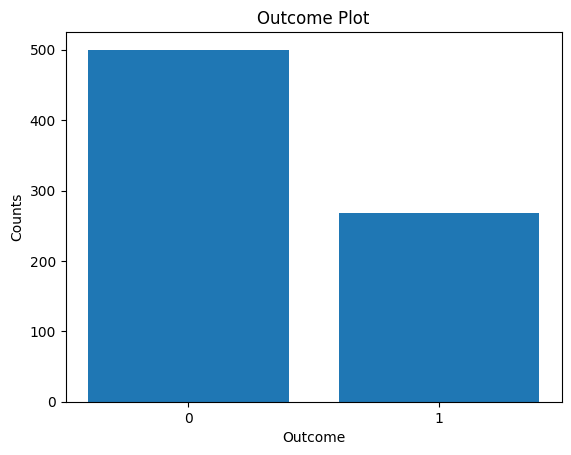

In [7]:
for columns in df:
  if columns != 'Outcome':
   df[columns].hist(bins=20)
   plt.title(columns+' Histogram')
   plt.xlabel(columns)
   plt.ylabel('Counts')
   plt.show()

values = ['0','1']
count=[df['Outcome'].value_counts()[0],df['Outcome'].value_counts()[1]]
plt.bar(values, count)
plt.title('Outcome Plot')
plt.xlabel('Outcome')
plt.ylabel('Counts')
plt



# data quality assessment

Με βάση τις πληροφορίες απο το προηγούμενο ερώτημα πιστεύω πως η ποιότητα των δεδομένων είναι κακή. Δύο λόγοι που συμβαίνει αυτό:

1.  Παρατηρούνται μηδενικές τιμές στα χαρακτηριστικά Glucose, BloodPressure, SkinThickness, Insulin, και BMΙ το οποιό είναι αδύνατον να γίνει στην πραγματικότητα . Η ύπαρξη αυτών των μηδενικών  δείχνει ότι τα δεδόμενα μας είτε είναι λανθασμένα είτε ελλιπή.
2.  Η κατανόμη των τιμών σε πολλά δεδομένα  δεν είναι καλή.Για παράδειγμα οι περισσότερες τιμές του Outcome είναι '0' δηλαδή οτί ο ασθενής δεν έχει διαβίτη.Αυτό μπορεί να επηρεάσει την εκπαίδευση του μοντέλου και να το οδηγήσει στο να μάθει να πρόβλεπει πάντα '0'.

# Distribution of the Age variable :

Από το ιστόγραμμα της μεταβλητής Age φαίνεται οτι η κατανόμη είναι εκθετική. Οι περισσοτερες τιμές αφορούν ασθενείς σε ηλικίες 20-40 και είναι ελάχιστες αυτές που αφορόυν τους ηλικιωμένους. Αυτή η κατανομή δεν είναι κατάλληλη καθώς με αυτά τα παραδείγματα το μοντελό θα εκπαιδεύτει πολύ καλά για τις συγκεκριμένες ηλικίες ομως για τους ηλικιωμένους οι προβλέψεις δεν θα είναι αξιόπιστες. Για αυτό το μοντέλο θα ήταν προτιμότερο να υπήρχε πιο ομοιόμορφη κατανόμη.

#  High glucose and diabetes

Για να διαπιστώσουμε την συνδέση του υψηλού επιπέδου γλυκόζης με την εμφάνιση του διαβίτη μπορούμε να βρούμε το ποσοστό των 100 ασθενών με την υψηλότερη τιμη σε γλυκόζη που έχουν διαβίτη.

In [8]:

top100 = df.sort_values(by='Glucose', ascending=False).head(100)
diabetic_ratio = top100['Outcome'].mean()*100
print(f"The Percentage of diabetics in the top 100 with the highest glucose levels is: {diabetic_ratio:.2f}%")




The Percentage of diabetics in the top 100 with the highest glucose levels is: 82.00%


Παρατηρούμε ότι ένα μεγαλό ποσοστό έχει διαβίτη οπότε οι κλινικές μελέτες διαπυστώνονται και από τα δεδομένα μας.


# Convert DataFrame to Numpy arrays

In [9]:
input_df = df.drop(columns=['Outcome'])
targets_df = df['Outcome']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((768, 8), (768,))

# Split Dataset to Train-Test

In [10]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((537, 8), (537,), (231, 8), (231,))

# Create a Logistic Regression Model

In [11]:
model = LogisticRegression(max_iter=1000, random_state=seed)

# Train model on training set

In [12]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

# Evaluate Model on test and train set

In [13]:
y_test_pred = model.predict(x_test)
y_train_pred=model.predict(x_train)
y_test_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [14]:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_accuracy_percentage = round(test_accuracy*100, 2)

print(f'The accuracy of the model in test set is: {test_accuracy_percentage}')


The accuracy of the model in test set is: 77.92


In [15]:
train_accuracy=accuracy_score(y_train,y_train_pred)
train_accuracy_percentage=round(train_accuracy*100,2)

print(f'The accuracy of the model in train set is: {train_accuracy_percentage}')

The accuracy of the model in train set is: 76.54


# Comments on the accuracy of the test set in relation to the train set

Παρατηρούμε ότι η ακρίβεια του μοντέλου είναι καλύτερη για τα  δεδόμενα επικύρωσεις από ότι για τα δεδομένα εκπαίδευσης.  

# Evaluate Patients with Age [0,25]

In [16]:
mask_025 = x_test[:, 7] <26

x_test_025 = x_test[mask_025]
y_test_025 = y_test[mask_025]
y_pred_025 = model.predict(x_test_025)

accuracy = accuracy_score(y_test_025, y_pred_025)
accuracy_percentage_025 = round(accuracy*100, 2)
accuracy_percentage_025
print(f'The accuracy of the model for age<=25 is: {accuracy_percentage_025}')


The accuracy of the model for age<=25 is: 85.56


# Evaluate Patient with Age (25,50]

In [17]:

mask_2550 = np.logical_and(x_test[:, 7] > 25, x_test[:, 7] <= 50)

x_test_2550 = x_test[mask_2550]
y_test_2550 = y_test[mask_2550]
y_pred_2550 = model.predict(x_test_2550)

accuracy = accuracy_score(y_test_2550, y_pred_2550)
accuracy_percentage_2550 = round(accuracy*100, 2)
print(f'The accuracy of the model for age(25,50] is: {accuracy_percentage_2550}')


The accuracy of the model for age(25,50] is: 70.0


# Evaluate Patient with Age >50

In [18]:
mask_50 = x_test[:, 7] >50

x_test_50 = x_test[mask_50]
y_test_50 = y_test[mask_50]
y_pred_50 = model.predict(x_test_50)

accuracy = accuracy_score(y_test_50, y_pred_50)
accuracy_percentage_50 = round(accuracy*100, 2)
print(f'The accuracy of the model for age>50 is: {accuracy_percentage_50}')

The accuracy of the model for age>50 is: 90.48


# Bar Plot By Age Group



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

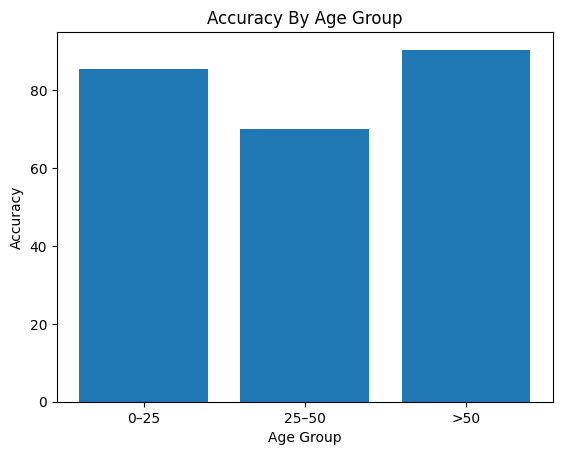

In [19]:
age_groups = ['0–25', '25–50', '>50']
accuracies = [accuracy_percentage_025, accuracy_percentage_2550, accuracy_percentage_50]

plt.bar(age_groups, accuracies)
plt.title('Accuracy By Age Group')
plt.xlabel('Age Group')
plt.ylabel('Accuracy')
plt

# Worst prediction

Το χειρότερο είναι το μοντέλο να προβλέψει ότι κάποιος δεν έχει διαβίτη ενώ έχει.Έτσι θα καθυστερίσησει τον ασθένη από το να λάβει την κατάλληλη θεραπεία και φροντίδα. Αυτή η καθυστεριμένη αντιμετώπιση του διαβίτη μπορεί να οδηγήσει σε σοβαρότερα προβλήματα στο μέλλον.

# Calculate our test and train accuracy for seed= [0,9]

In [20]:
test_accuracies=[]
train_accuracies=[]
for seed in range(10):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
  model = LogisticRegression(max_iter=1000, random_state=seed)
  model.fit(x_train,y_train)
  y_test_pred = model.predict(x_test)
  y_train_pred=model.predict(x_train)
  test_accuracy=accuracy_score(y_test,y_test_pred)
  train_accuracy=accuracy_score(y_train,y_train_pred)
  test_accuracies.append(test_accuracy)
  train_accuracies.append(train_accuracy)
print(f"Test Accuracies: {test_accuracies}")
print(f"Train Accuracies: {train_accuracies}")

Test Accuracies: [0.7792207792207793, 0.7835497835497836, 0.7489177489177489, 0.7532467532467533, 0.8095238095238095, 0.7835497835497836, 0.7662337662337663, 0.7792207792207793, 0.7792207792207793, 0.7445887445887446]
Train Accuracies: [0.7653631284916201, 0.7728119180633147, 0.7858472998137802, 0.7877094972067039, 0.7597765363128491, 0.7635009310986964, 0.7690875232774674, 0.7821229050279329, 0.7783985102420856, 0.8007448789571695]


# Calculate the mean and standard deviation of our test accuracy for seed= [0,9]

In [142]:
mean_test_accuracy = np.mean(test_accuracies)
std_test_accuracy = np.std(test_accuracies)
print(f"Mean accuracy: {mean_test_accuracy:.3f}, Standard deviation: {std_test_accuracy:.3f}")

Mean accuracy: 0.773, Standard deviation: 0.019


# Calculate the mean and standard deviation of our train accuracy for seed= [0,9]

In [21]:
mean_train_accuracy = np.mean(train_accuracies)
std_train_accuracy = np.std(train_accuracies)
print(f"Mean accuracy: {mean_train_accuracy:.3f}, Standard deviation: {std_train_accuracy:.3f}")

Mean accuracy: 0.777, Standard deviation: 0.012


# Create a def Min-Max for data normalization

In [22]:
def min_max(data):
  scaler = MinMaxScaler()
  normalized_data = scaler.fit_transform(data)
  return normalized_data

# Apply Min-Max data normalization

In [23]:
x_normalized=min_max(x)


# Split the Normalized Dataset to Train-Test

In [24]:
seed=0
x_train, x_test, y_train, y_test = train_test_split(
    x_normalized, y, test_size=0.3, random_state=seed)

## Create and fit a Logistic Regression Model for normalized data

In [25]:
model = LogisticRegression(max_iter=1000, random_state=seed)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000, random_state=0)

# Feature Importance

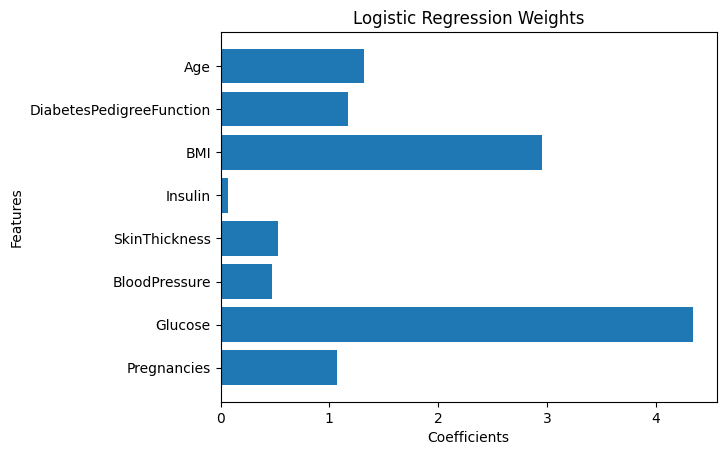

In [26]:
coeffs = model.coef_[0]
importance_weights = np.abs(coeffs)
plt.barh(input_df.columns, importance_weights)
plt.title('Logistic Regression Weights')
plt.xlabel('Coefficients')
plt.ylabel('Features')
plt.show()


Όσο μεγαλύτερο είναι το απόλυτο βάρος e, τόσο καλύτερα.Οπότε όπως φαίνεται από το διάγραμμα οι 3 πιο σημαντικές παράγοντες που επηρεάζουν την πρόβλεψη  είναι η Glucose η BMI και η Age.

# **PART II LinearRegression**

# Convert DataFrame to Numpy arrays

In [27]:
input_df = df[['Pregnancies', 'BloodPressure', 'BMI', 'Age']]
targets_df = df['Glucose']
x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((768, 4), (768,))

# Split Dataset to Train-Test

In [28]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((537, 4), (537,), (231, 4), (231,))

# Create a Linear Regression Model

In [29]:
model=LinearRegression()

# Train model on training set

In [30]:
model.fit(x_train,y_train)

LinearRegression()

# Evaluate the model in the Test Set

In [31]:
y_pred=model.predict(x_test)


# Calculation  of MAE and MSE

In [32]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 929.89
Mean Absolute Error (MAE): 23.60


Το ΜΑΕ είναι η πιο κατάλληλη μετρική. Αυτό συμβαίνει επειδή η  συνάρτηση απώλειας MAE είναι πιο ανθεκτική στις ακραίες τιμές σε σύγκριση με τη συνάρτηση απώλειας MSE. Επομένως, είναι αυτή που πρέπει να χρησιμοποιηθεί καθώς τα δεδομένα μας εμφανίζουν αρκετές ακραίες τιμές.

# Use Lasso Regresssion to calculate the accuracy with MAE For Various alphas

In [33]:
alpha=[0.2, 0.4, 0.6, 0.8, 1.0]
mae_accuracies=[]
for a in alpha:
  model=Lasso(alpha=a,max_iter=1000)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  lasso_mae=mean_absolute_error(y_test,y_pred)
  mae_accuracies.append(lasso_mae)
mae_frame=pd.DataFrame({'Alpha':alpha,'MAE':mae_accuracies,})
mae_frame



,Alpha,MAE
0,0.2,23.594203
1,0.4,23.588415
2,0.6,23.582629
3,0.8,23.576843
4,1.0,23.571058


## Apply Min-Max data normalization

In [34]:
x_normalized=min_max(x)

# Split the Normalized Dataset to Train-Test

In [35]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=test_size, random_state=seed)



## Create and fit a Linear Regression Model for normalized data

In [36]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# Find  the feature with the lowest weight (coefficient)

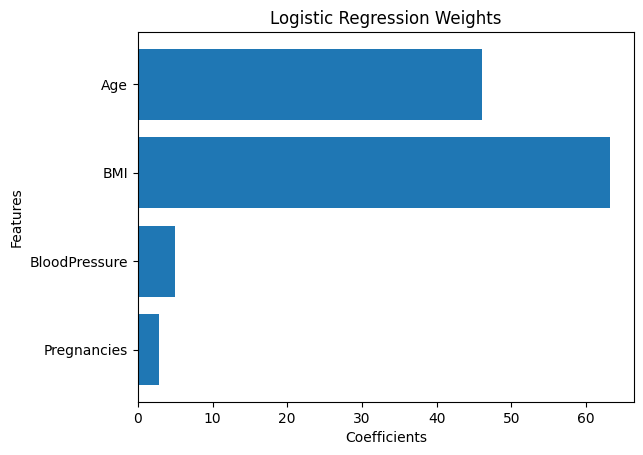

In [37]:
coeffs = model.coef_
importance_weights = np.abs(coeffs)
plt.barh(input_df.columns, importance_weights)
plt.title('Logistic Regression Weights')
plt.xlabel('Coefficients')
plt.ylabel('Features')
plt.show()
min_index = np.argmin(importance_weights)


Όπως προκύπτει απο το γράφημα ο συντελεστής με την χαμηλότερη βαρύτητα είναι οι εγκυμοσύνες

# Removal of the Feature from the set





In [38]:
new_x=np.delete(x,min_index,axis=1)


# Create and train a Logistic Regression Model

In [39]:
seed = 0
test_size = 0.3

x_train,x_test,y_train,y_test = train_test_split(new_x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape,y_test.shape
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# Evaluate the model in Test Set

In [40]:
y_new_pred=model.predict(x_test)
new_mae=mean_absolute_error(y_test,y_new_pred)

# comparison of the accuracy of the model before removing  the feature and after removing it

In [44]:
print(f"The accuracy of the model with all features is:{mae:.3f}")
print(f"The accuracy of the model without Pregnancy is:{new_mae:.3f}")

The accuracy of the model with all features is:23.600
The accuracy of the model without Pregnancy is:23.588


Παρατηρούμε οτί η η επίδοση του μοντέλου χωρίς το χαρακτηριστικό είναι ελάχιστα καλύτερη.Αυτό δείχνει ότι το χαρακτηριστικό είναι ασήμαντο και θα μπορούσε και να μην χρησιμοποιηθεί για την εκπαίδευση του μοντέλου.